# Random Forest

Slides: [link](https://docs.google.com/presentation/d/18KIHEHceqyeOGEOSPFZY-GWKGejYfztpqVruwCuf-QU/edit?usp=sharing)

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image  
from sklearn import tree
import pydotplus
from sklearn import metrics
#from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Breast Cancer Random Forest Classifier

In [43]:
bc=pd.read_csv('breast_cancer_scikit_onehot_dataset.csv')

In [44]:
target=bc['class']
target = bc['class'].map(lambda x: 1 if x == 4 else 0).values 
target = pd.Series(target)

In [45]:
predictor=bc.drop(columns=['class'])
predictor.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0


In [46]:
target.value_counts(normalize=True)

0    0.634446
1    0.365554
dtype: float64

In [47]:
# Import train_test_split function
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3,random_state=9) 

In [48]:
# fit our model
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,class_weight='balanced', n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [49]:
importances = rnd_clf.feature_importances_

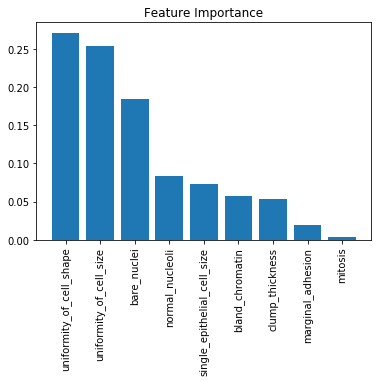

In [50]:
# creating list of column names
feat_names=list(X_train)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feat_names[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [51]:
# Predictions for the test data
y_pred = rnd_clf.predict(X_test)

In [52]:
# Class Probailities
yprob = rnd_clf.predict_proba(X_test)
yprob
yprob[:5]

array([[9.98654837e-01, 1.34516347e-03],
       [2.60897627e-01, 7.39102373e-01],
       [9.99001819e-01, 9.98181348e-04],
       [5.06693053e-02, 9.49330695e-01],
       [9.98489548e-01, 1.51045158e-03]])

In [53]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9590643274853801


In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[97,  4],
       [ 3, 67]])

In [55]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

NameError: name 'sns' is not defined

<Figure size 396x288 with 0 Axes>

In [56]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9503546099290779

# Grid Search

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=16, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [57]:
# parameters we are interested in exploring
param_grid = [{'n_estimators': [4,6,7,10], 'max_features': [2, 4, 6, 8],  'max_leaf_nodes':[5,10,15,20],'class_weight':['balanced']},]
forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,scoring='f1',return_train_score=True)

#fit model with parameters from grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [58]:
# Return the best parameters
grid_search.best_params_

{'class_weight': 'balanced',
 'max_features': 2,
 'max_leaf_nodes': 15,
 'n_estimators': 10}

In [59]:
y_pred = grid_search.predict(X_test)

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9590643274853801


In [61]:
print("f1 Score:",f1_score(y_test, y_pred))

f1 Score: 0.9510489510489512


## Class Work 
### Implement Gradient Boosting Classifier and Grid Seach
- Use favorite implementation
- Boosting Algorithms: [link](https://towardsdatascience.com/https-medium-com-talperetz24-mastering-the-new-generation-of-gradient-boosting-db04062a7ea2)

In [65]:
!conda install py-xgboost
y

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::pydotplus==2.0.2=py36_1
  - defaults/osx-64::entrypoints==0.3=py36_0
  - defaults/osx-64::webencodings==0.5.1=py36_1
  - defaults/osx-64::s3transfer==0.2.1=py36_0
  - defaults/osx-64::scipy==1.1.0=py36h1410ff5_2
  - conda-forge/osx-64::jupyter_highlight_selected_word==0.2.0=py36_1000
  - defaults/osx-64::networkx==2.2=py36_1
  - defaults/osx-64::python-dateutil==2.8.0=py36_0
  - defaults/osx-64::cython==0.28.5=py36h0a44026_0
  - defaults/osx-64::testpath==0.4.2=py36_0
  - defaults/osx-64::ptyprocess==0.6.0=py36_0
  - defaults/osx-64::numpy-base==1.16.5=py36h6575580_0
  - defaults/osx-64::beautifulsoup4==4.7.1=py36_1
  - defaults/osx-64::simplegeneric==0.8.1=py36_2
  - defaults/osx-64::seaborn==0.9.0=py36_0
  - conda-forge/noarch::joblib==0.14.0=py_0
  - defaults/osx-64::asn1crypto==0.24.0=py36_0
  - conda-forge/noar

NameError: name 'y' is not defined

In [67]:
import xgboost as xgb

In [68]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

Parameters XGBOOST: [link](https://xgboost.readthedocs.io/en/latest/parameter.html)



In [69]:
param_grid = {"learning_rate": [0.1,0.01,.5],'max_depth': [1,5,10,20],'min_child_weight': [10],'subsample': [ 0.5],'n_estimators': [5, 30, 100, 250,1000],}

In [70]:
from sklearn.model_selection import GridSearchCV
xgb_clf= xgb.XGBClassifier()
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5,scoring='f1',return_train_score=True)

#fit model with parameters from grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=True,
                                     subsample=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [1, 5, 10, 20], 'min_child_weight': [10],
                         'n_estimators': [5, 30, 100, 250, 1

In [36]:
y_pred = grid_search.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9532163742690059


In [37]:
print("f1 Score:",f1_score(y_test, y_pred))

f1 Score: 0.9428571428571428


In [66]:
# !pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [72]:
from catboost import CatBoostClassifier, Pool, cv
cboost = CatBoostClassifier()